# Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables gdp and pop have been loaded for you.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

gdp = pd.read_csv(r'datasets/WorldBank_GDP.csv')
gdp = gdp[['Country Name', 'Year', 'GDP']]
pop = pd.read_csv(r'datasets/WorldBank_POP.csv')
pop = pop[['Country Name', 'Year', 'Pop']]

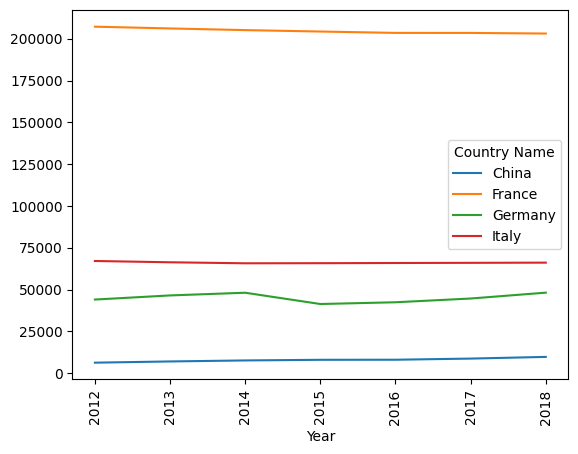

In [2]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name', 'Year'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP'] /gdp_pop['Pop']

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = pd.pivot_table(gdp_pop, index='Year', columns='Country Name', values='gdp_per_capita')

gdp_pivot = gdp_pivot[['China', 'France', 'Germany', 'Italy']]

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('Year >= 2012')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

Amazing! By using the .query() method, you were able to select the appropriate rows easily. The .query() method is easy to read and straightforward.